<div style="border:solid black 2px; padding: 20px">

# Reviewer's feedback v.1

**Halo Alexa**
    
**Greetings from Chamdani**

Terima kasih telah mengirimkan project kamu dengan ini kamu sudah memulai sebuah langkah yang luar biasa saat ini. Disini saya akan mereview proyek kamu ya.

Saya akan memberikan beberapa komentar dan feedback seperti dibawah ini, **mohon jangan dipindah, dirubah, maupun dihapus ya :).**
    
> Mohon diperhatikan bahwa apabila ada temuan atau kesalahan yang sama namun tidak ada komentar perbaikan disana, itu berarti kamu masih tetap harus memperbaikinya yaa.

Komentar yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

</div>

<div class="alert alert-success">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Ada beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Chamdani's comment v.*</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan.

</div>

<div class="alert alert-info">
<b>Chamdani's info v.1</b> <a class="tocSkip"></a>

Catatan umum:
* Fungsi `print` tidak diperlukan untuk mencetak suatu nilai
* Lebih baik tulis kode pada bagian akhir cell code untuk menampilkan output tanpa `print`
* Perintah soal yang ada dalam tanda kurung siku `[...]` sebaiknya dihilangkan
* Sangat disarankan untuk menggunakan cell markdown untuk memberikan deskripsi temuan atau kesimpulan.
* Tidak disarankan menggunakan cell code untuk memberikan penjelasan / deskripsi.
* Untuk menghindari galat pada notebook project kamu. Batasi jumlah output yang dikeluarkan setiap kode dengan batas max 10 baris data.

</div>

<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

**INGATLAH** 
* Project kamu tidak akan bisa diterima bila kamu masih memiliki feedback berwarna merah. 
* Kamu hanya memiliki 3 kali kesempatan iterasi submission disetiap projectnya 
* Jika merasa kesulitan kamu dapat menuliskan responmu atas feedback saya menggunakan blok markdown warna biru dan kamu bisa mengirimkan project pada submission selanjutnya untuk mendapatkan jawaban / respon dari saya segera yaa

Kamu dapat menjawab saya dengan menggunakan blok berwarna biru seperti ini

<div class="alert alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

Siap kak.

</div>

<div style="border:solid black 2px; padding: 20px" class="alert alert-success">
    
# General feedback v.1 *Project Accepted*

Terima kasih banyak telah mengirimkan proyek Anda! 
<br>
    
Secara keseluruhan, proyek Anda **SANGAT** mengesankan. Semoga apa yang kamu pelajari dalam project ini dapat membantu meningkatkan kemampuanmu. Pertahankan apa yang sudah bagus, dan tingkatkan apa yang menurutmu masih perlu ditingkatkan. Semoga berhasil pada project selanjutnya yaa :)

**TETAP SEMANGAT!!**
    
</div>

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Hebat, Kerja bagus!

</div>

# Deskripsi tugas

Perusahaan taksi bernama Sweet Lift telah mengumpulkan data historis tentang pesanan taksi di bandara. Untuk menarik lebih banyak pengemudi pada jam sibuk, perlu memprediksi jumlah pesanan taksi untuk satu jam berikutnya. Buat model untuk prediksi seperti itu.

Metrik RMSE pada *test set* tidak boleh lebih dari 48.

## Instruksi tugas

1. Unduh data dan lakukan *resampling* dalam satu jam.
2. Analisis datanya.
3.  Latih model yang berbeda dengan hiperparameter yang berbeda pula. Sampel tes harus 10% dari *dataset* awal.
4. Uji data menggunakan sampel tes dan berikan kesimpulan.



## Deskripsi data

Data tersimpan di file `taxi.csv`. Jumlah pesanan di kolom'*num_orders*'.

## Persiapan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error as MAE

#models
from sklearn.linear_model import LinearRegression

#AutoRegressive
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
#Memuat dataset
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col = [0])
data.sort_index(inplace=True)

In [3]:
#Memeriksa dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<AxesSubplot:xlabel='datetime'>

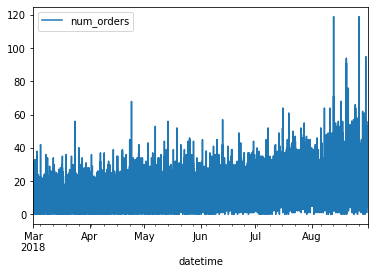

In [5]:
data.plot()

In [6]:
#Melakukan resample dalam satu jam
data = data.resample('1H').sum()

<AxesSubplot:xlabel='datetime'>

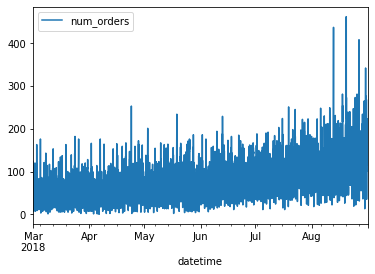

In [7]:
data.plot()

In [8]:
data.shape

(4416, 1)

Data telah diresampling menjadi ke dalam timeframe 1 hari.

## Analisis

Terdapat beberapa hal yang akan dianalisa dari dataset yang dimiliki

### Trend dan Seasonal

In [9]:
decomposed = seasonal_decompose(data)

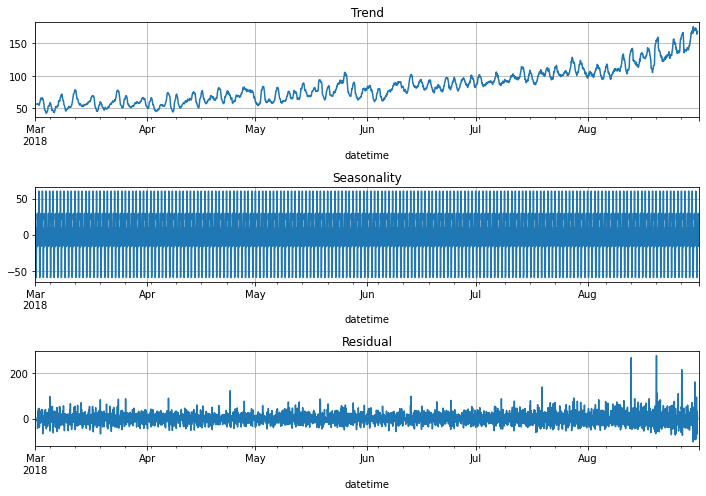

In [10]:
plt.figure(figsize=(10,7))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.grid()
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.grid()
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')
plt.grid()
plt.tight_layout()

Seasonalitynya sangat rapat sekali. Mari kita lihat dalam trayek waktu satu bulan.

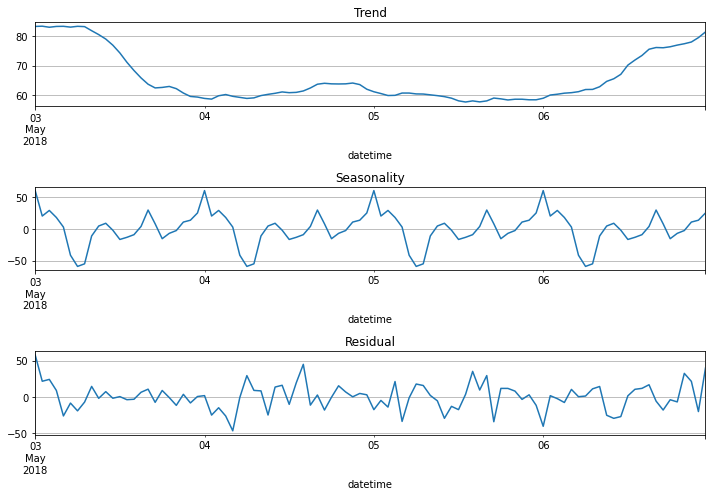

In [11]:
plt.figure(figsize=(10,7))
plt.subplot(311)
decomposed.trend['2018-05-03':'2018-05-06'].plot(ax=plt.gca())
plt.title('Trend')
plt.grid()
plt.subplot(312)
decomposed.seasonal['2018-05-03':'2018-05-06'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.grid()
plt.subplot(313)
decomposed.resid['2018-05-03':'2018-05-06'].plot(ax=plt.gca())
plt.title('Residual')
plt.grid()
plt.tight_layout()

Terjadi seasonality berulang pada trayek waktu satu hari. Mari kita lihat lebih detail pada tanggal 8 bulan mei.

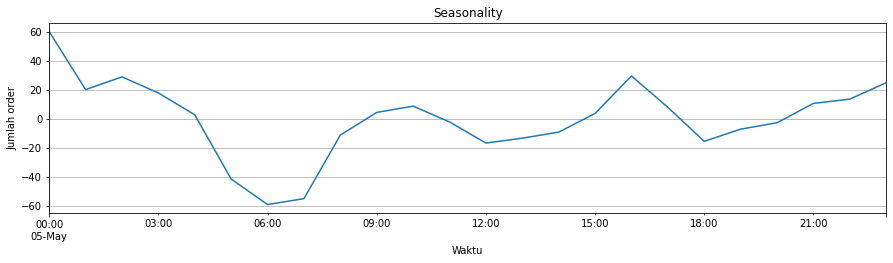

In [12]:
plt.figure(figsize=(15,3.5))
decomposed.seasonal['2018-05-05'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlabel('Waktu')
plt.ylabel('Jumlah order')
plt.grid()

Berdasarkan grafik seasonal di atas, terjadi kecenderungan jumlah order taxi di jam-jam tertentu setiap harinya.
1. Terjadi peningkatan order taxi sejak jam 6 malam dengan puncak pada pukul 12 malam hari. Hal ini dapat disebabkan karena pada jam-jam malam akses kepada transportasi umum lain sulit. Seperti KRL di Jakarta yang tutup setelah jam 11 malam. Ojek online juga kadang membutuhkan waktu lama untuk mendapatkan driver. Sedangkan taxi biasanya sudah standby di Bandara, terutama pada jam-jam pendaratan.
2. Terjadi penurunan order sejak pukul 12 malam hingga pagi hari pukul 6 pagi sekaligus menjadikan jam 6 pagi sebagai waktu dimana order mencapai titik terendahnya. Hal ini bisa disebabkan oleh jarang sekali ada kedatangan pesawat di jam-jam tersebut.
3. Selain jam 00:00 terjadi peak order taxi pada pukul 10:00 siang, dan 16:00 sore. Namun secara value di trend seasonal nilainya sebagus pada jam-jam malam. Hal ini bisa disebabkan oleh banyaknya alternatif transportasi lain seperti Damri yang mungkin lebih digemari karena murah.

### Mengecek tingkat stasioner trend

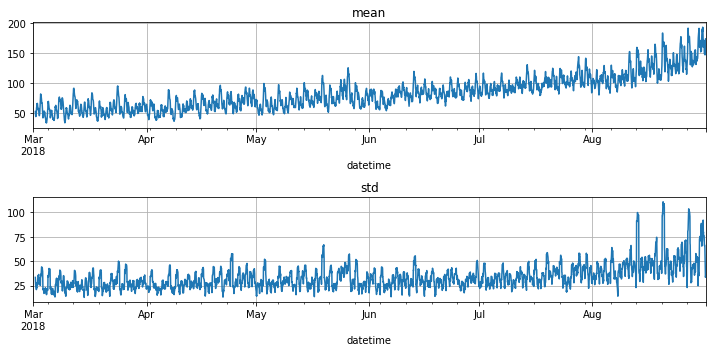

In [13]:
import pandas as pd
sta = pd.DataFrame()
sta['mean'] = data['num_orders'].rolling(15).mean()
sta['std'] = data['num_orders'].rolling(15).std()

plt.figure(figsize=(10,5))
plt.subplot(211)
sta['mean'].plot()
plt.title('mean')
plt.grid()
plt.subplot(212)
plt.title('std')
sta['std'].plot()
plt.grid()
plt.tight_layout()
plt.show()

Berikut adalah insight yang diperoleh dari data trend mean dan standar deviasi di atas.
1. Terjadi peningkatan/trend positive pada nilai order seiring waktu. Dengan perubahan yang signifikan terjadi setelah bulan Juli. Pada bulan Mar-Jun order taxi rata-rata harian berkisar antara 50-an hingga 100-an itu pun jarang sekali menyentuh angka 100 order per Hari. Namun pada bulan Juni peningkatan order terjadi sangat signifikan hingga YTD dari sekitar 100-an order di bulan Juli hingga diakhir analisa data mencapai 150 order per hari bahkan hampir menyentuh 200 order.
2. Meskipun terjadi peningkatan order setelah bulan Juli tapi volatilitasnya juga meningkat yang ditandai dengan peningkatan nilai standar deviasinya. Namun secara overal titik terendahnya berada di titik 70-an order per hari. Masih cukup baik. 

## Pelatihan

In [14]:
#Fungsi untuk menghitung RMSE
from sklearn.metrics import mean_squared_error

def rmse(true, pred):
    return mean_squared_error(true, pred)**0.5

### Model Timeseries (SARIMA)

**Membagi dataset menjadi features dan target serta train, validation, dan test**

In [15]:
data_mt = data.copy()

In [16]:
from sklearn.model_selection import train_test_split
sisa_mt, test_mt = train_test_split(data_mt, shuffle=False, test_size = 0.1)
train_mt, valid_mt = train_test_split(sisa_mt, shuffle=False, test_size =0.222)

**Membuat data stasioner**

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
# Augmented Dickey-Fuller test
adf_test = adfuller(data_mt['num_orders'])

# Extracting the p-value and test statistics
adf_statistic = adf_test[0]
p_value = adf_test[1]

alpha = .05
if p_value < 0.05:
    print(f'p-value : {p_value:.4f} <',alpha)
    print('H0 ditolak, data stationer')
else:
    print(f'p-value : {p_value:.4f} >',alpha)
    print('H0 ditolak, data non-stationer')
    



p-value : 0.0289 < 0.05
H0 ditolak, data stationer


Meskipun secara grafik pada pembahas sebelumnya menunjukan terjadi perubahan std deviasi. Namun secara statistik menunjukan data yang dimiliki termasuk stationer. Mungkin perubahan std hanya terjadi dibulan-bulan tertentu saja. Dikarenakan data telah stationer maka tidak perlu dilakukan proses differensiasi. Selanjutnya yaitu mencari parameter ARIMA dengan plot acf dan pacf.

**Mencari parameter SARIMA**

Parameter AR (p) dan MA (q), serta parameter seasonal P dan Q dicari dengan menggunakan plot pacf-acf. Sedangkan nilai d dan D ditetapkan 0 karena dataset tidak memerlukan proses differensiasi.

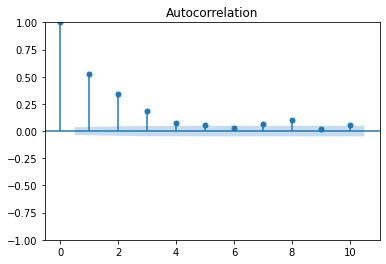

In [19]:
plot_acf(train_mt, lags=10, alpha = .05);

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


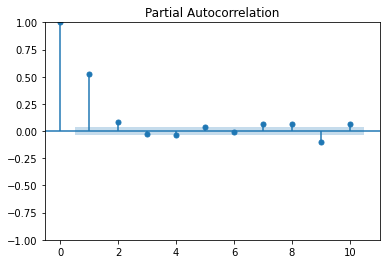

In [20]:
plot_pacf(train_mt, lags = 10, alpha = .05);

Berdasarkan grafik di atas, diperoleh nilai p sebesar 2 dilihat dari jumlah titik yang berada diluar zona biru. Sedangkan nilai q nya adalah 4. Selanjutnya yaitu mencari parameter seasonality P dan Q, dikarenakan seasonality terjadi setiap 1 hari sekali, dan kita memiliki timestep sebesar 1 jam. maka dicari dengan lags kelipatan 24.

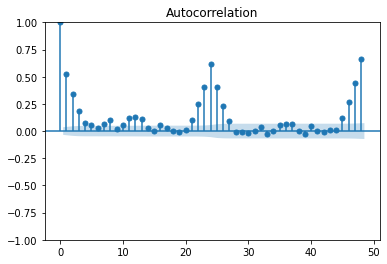

In [21]:
plot_acf(train_mt, lags=48, alpha = .05);

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1008x288 with 0 Axes>

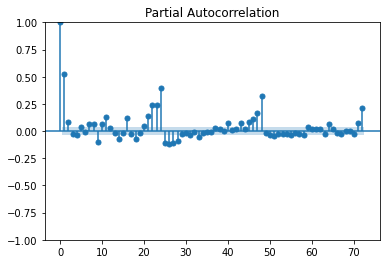

In [22]:
plt.figure(figsize=(14,4))
plot_pacf(train_mt, lags=72, alpha = .05)
plt.show()

Berdasarkan chatGPT berdasarkan grafik di atas, diperoleh nilai P dan Q adalah 1 dan 2. Diperoleh dengan melihat signifikansi data pada lag ke 24, 48. Pada plot acf terdapat dua paku musiman yang menonjol sedangkan pada plot pacf ada 1. Sehingga diperoleh parameter SARIMA sebagai berikut:
1. p = 2
2. d = 0
3. q = 4
4. P = 1
5. D = 0
6. Q = 2
7. S = 24

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [24]:
%%time
sarima = ARIMA(train_mt, order=(2,0,4), seasonal_order =(1,0,2,24))
model_sarima = sarima.fit()

CPU times: user 3min 23s, sys: 1min 21s, total: 4min 44s
Wall time: 4min 46s


In [25]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                            num_orders   No. Observations:                 3091
Model:             ARIMA(2, 0, 4)x(1, 0, [1, 2], 24)   Log Likelihood              -13633.268
Date:                               Mon, 08 Jan 2024   AIC                          27288.536
Time:                                       01:51:16   BIC                          27354.935
Sample:                                   03-01-2018   HQIC                         27312.383
                                        - 07-07-2018                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6552     12.035      5.871      0.000      47.068      94.243
ar.L1          0.0822      0.589      0.139      0.889      -1.073       1.237
ar.L2          0.7497      0.532      1.409      0.159      -0.293       1.792
ma.L1          0.1089      0.589      0.185      0.853      -1.046       1.264
ma.L2         -0.6202      0.421     -1.475      0.140      -1.444       0.204
ma.L3         -0.0258      0.028     -0.909      0.363      -0.081       0.030
ma.L4         -0.0106      0.021     -0.509      0.611      -0.051       0.030
ar.S.L24       0.9951      0.002    659.559      0.000       0.992       0.998
ma.S.L24      -0.9479      0.017    -56.561      0.000      -0.981      -0.915
ma.S.L48       0.0698      0.017      4.166      0.000       0.037       0.103
sigma2       390.5387      7.340     53.204      0.000     376.152     404.926
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               735.40
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Hanya parameter seasonal yang signfikan sedangkan parameter ARIMA seluruhnya memiliki p-value < 0.05.

In [26]:
pred_train = model_sarima.predict(
    start=0, 
    end=train_mt.shape[0]-1, 
    dynamic=False)
pred_valid = model_sarima.predict(
    start=train_mt.shape[0], 
    end=train_mt.shape[0]+valid_mt.shape[0]-1, 
    dynamic=False)

In [27]:
print(f'Nilai RMSE Training: {rmse(train_mt[3:], pred_train[3:]):.4f}')
print(f'Nilai RMSE Validation: {rmse(valid_mt, pred_valid):.4f}')

Nilai RMSE Training: 19.9205
Nilai RMSE Validation: 34.6083


Diproleh RMSE validation sebesar 34.6, nilai yang cukup besar. Saya juga telah melakukan percobaan dengan parameter pdqPDQ yang lain nilai RMSE yang diperoleh semakin anjlok (sumber: trust me) proses iterasi tidak ditampilkan karena saya lakukan di Anaconda Spyder supaya prosesnya lebih cepat dengan bantuan GPU. Bisa jadi hal ini dikarenakan dataset yang ditraining terlampau banyak. Apabila kita melihat grafik order taxi di atas, kita bisa melihat terjadi peningkatanorder yang signfikan terhitung sejak bulan Juni. Nilai RMSE yang tinggi bisa jadi disebabkan oleh pada training dataset datanya cukup konstan, sehingga perubahan trend yang terjadi tidak tercapture pada saat training.

Menggunakan parameter pdqPDQ yang lebih tinggi membuat proses training begitu lama.

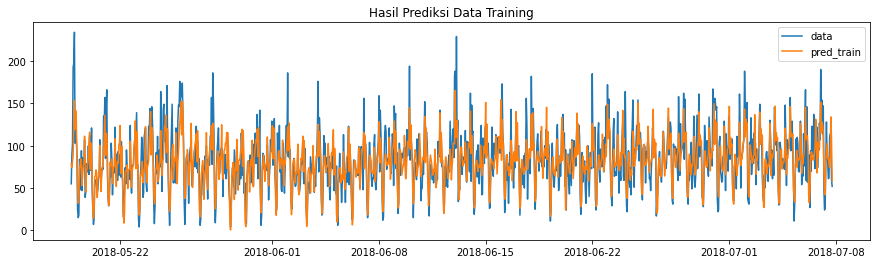

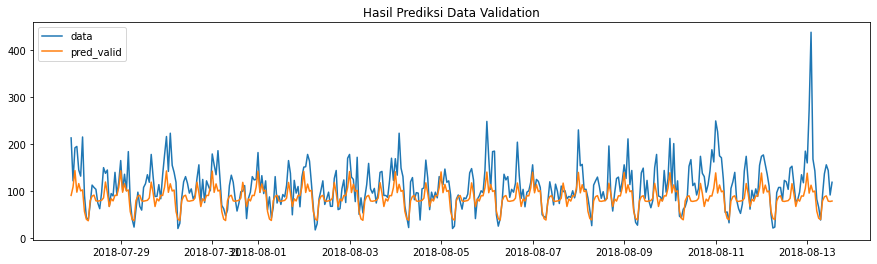

In [28]:
plt.figure(figsize=(15,4))
plt.title('Hasil Prediksi Data Training')
plt.plot(train_mt[-1200:],'', label = 'data')
plt.plot(pred_train[-1200:],label = 'pred_train')
plt.legend()
plt.show()

plt.figure(figsize=(15,4))
plt.title('Hasil Prediksi Data Validation')
plt.plot(valid_mt[-400:],'', label = 'data')
plt.plot(pred_valid[-400:],label = 'pred_valid')
plt.legend()
plt.show()

Performa model jauh lebih baik daripada jika kita memprediksi data dengan nilai mediannya. Berdasarkan grafik di atas, terlihat bahwa model berhasil memprediksi pola seasonal yang terjadi. Namun jika diperhatikan lebih lanjut nilai data terprediksi selalu berulang, dimana setiap pola memiliki nilai yang sama. Dikarenakan data yang dimiliki cukup stasioner, sehingga tidak masalah pada dataset training. Namun pada dataset validation, dimana pada bulan juli ke atas terjadi perubahan nilai yang signifikan maka pola sama yang berulang tersebut tidak lagi fit dengan baik (semakin melenceng) yang ditandai dengan meningkatnya nilai RMSE. Saya tebak untuk data test nilai RMSEnya akan jauh meningkat lagi. Namun model ini dapat memprediksi peak seasonality dengan baik.

### Non Timeseries Specific Model

**Mempersiapkan fitur**

Terdapat beberapa fitur yang akan dibaut diantaranya:
1. Fitur kalender, yang berisi hari, bulan, dan tahun 
2. Fitur lag
3. Fitur moving average (MA)

Proses pembuatan fitur akan dilakukan dalam sebuah function. parameter lag dan rollong_mean_size akan mengikuti hasil optimasi paramter pada model SARIMA. yaitu max_lag = 2 dan rolling_mean_size = 4.

In [29]:
def makeFeatures(data, max_lag = 5, rolling_mean_size = 10):
    #Fitur kalender
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    #Fitur lag
    for lag in range(1, max_lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
    #Fitur MA
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [30]:
makeFeatures(data)

In [31]:
data = data.dropna()
print(data.shape)
data.head()

(4406, 11)


,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,
2018-03-01 10:00:00,64,2018,3,1,3,69.0,34.0,15.0,12.0,6.0,52.5
2018-03-01 11:00:00,96,2018,3,1,3,64.0,69.0,34.0,15.0,12.0,46.5
2018-03-01 12:00:00,30,2018,3,1,3,96.0,64.0,69.0,34.0,15.0,47.6
2018-03-01 13:00:00,32,2018,3,1,3,30.0,96.0,64.0,69.0,34.0,43.5
2018-03-01 14:00:00,48,2018,3,1,3,32.0,30.0,96.0,64.0,69.0,40.1


**Membagi dataset menjadi dataset training, validation, dan test**

Berikut adalah ketentuan dalam pembuatan training, validation, dan test dataset:
1. Urutan dataset secara waktu yaitu training, validation dan test. dimana test tidak boleh mendahului validation dan training set. Begitu juga dengan validation tidak boleh mendahului training set.
2. Training, validation, dan test set tidak boleh digabung dalam artian data tidak boleh di shuffle.
3. Dataset akan dibagi dengan rasio train:valid:test sebesar 7:2:1.

In [32]:
from sklearn.model_selection import train_test_split
sisa, test = train_test_split(data, shuffle=False, test_size = 0.1)
train, valid = train_test_split(sisa, shuffle=False, test_size =0.222)

In [33]:
print(f'Ukuran dataset training = {train.shape[0]/data.shape[0]:.4f}')
print(f'Ukuran dataset validation = {valid.shape[0]/data.shape[0]:.4f}')
print(f'Ukuran dataset  test = {test.shape[0]/data.shape[0]:.4f}')

Ukuran dataset training = 0.7000
Ukuran dataset validation = 0.2000
Ukuran dataset  test = 0.1001


In [34]:
train.tail()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,
2018-07-07 17:00:00,60,2018,7,7,5,114.0,114.0,110.0,62.0,61.0,86.5
2018-07-07 18:00:00,52,2018,7,7,5,60.0,114.0,114.0,110.0,62.0,89.8
2018-07-07 19:00:00,82,2018,7,7,5,52.0,60.0,114.0,114.0,110.0,86.7
2018-07-07 20:00:00,76,2018,7,7,5,82.0,52.0,60.0,114.0,114.0,82.1
2018-07-07 21:00:00,72,2018,7,7,5,76.0,82.0,52.0,60.0,114.0,81.2


In [35]:
valid.tail()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,
2018-08-13 10:00:00,156,2018,8,13,0,137.0,91.0,39.0,66.0,83.0,159.7
2018-08-13 11:00:00,144,2018,8,13,0,156.0,137.0,91.0,39.0,66.0,159.3
2018-08-13 12:00:00,92,2018,8,13,0,144.0,156.0,137.0,91.0,39.0,146.4
2018-08-13 13:00:00,119,2018,8,13,0,92.0,144.0,156.0,137.0,91.0,111.9
2018-08-13 14:00:00,102,2018,8,13,0,119.0,92.0,144.0,156.0,137.0,107.0


In [36]:
test.tail()

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean
datetime,,,,,,,,,,,
2018-08-31 19:00:00,136,2018,8,31,4,207.0,217.0,197.0,116.0,133.0,173.3
2018-08-31 20:00:00,154,2018,8,31,4,136.0,207.0,217.0,197.0,116.0,166.6
2018-08-31 21:00:00,159,2018,8,31,4,154.0,136.0,207.0,217.0,197.0,162.9
2018-08-31 22:00:00,223,2018,8,31,4,159.0,154.0,136.0,207.0,217.0,162.1
2018-08-31 23:00:00,205,2018,8,31,4,223.0,159.0,154.0,136.0,207.0,170.8


Training, validation dan test dataset telah berhasil dibuat sesuai dengan ketentuan. Selanjutnya yaitu mendefinisikan feature dan target.

In [37]:
#Feature
features_train= train.drop(['num_orders'], axis = 1)
features_valid = valid.drop(['num_orders'], axis = 1)
features_test = test.drop(['num_orders'], axis = 1)

#Target
target_train= train['num_orders']
target_valid = valid['num_orders']
target_test = test['num_orders']

**Sanity Check**

Sanity check dilakukan dengan cara menghitung RMSE apabila nilai target pada saat t bernilai sama dengan target saat t-1. Nilai RMSE ini akan menjadi benchmark. Selain itu nilai median juga akan dievaluasi.

In [38]:
pred_prev = target_test.shift()
pred_prev.iloc[0] = target_train.iloc[-1]

print(f'Nilai RMSE baseline (bases t-1) adalah {rmse(target_test, pred_prev):.4f}')

pred_prev = np.ones(target_test.shape[0])*target_train.median()
print(f'Nilai RMSE baseline (basis median) adalah {rmse(target_test, pred_prev):.4f}')

Nilai RMSE baseline (bases t-1) adalah 59.0191
Nilai RMSE baseline (basis median) adalah 92.5482


Nilai RMSE ini akan menjadi pembanding apakah model yang dibuat nanti dapat menghasilkan RMSEyang lebih baik atau tidak. Sebelumnya telah dihitung RMSE untuk ARIMA, hasilnya model ARIMA terbukti mampu memprediksi jauh lebih baik dibandingkan hanya kita memprediksi menggunakan nilai sebelumnya.

#### Linear Regression

In [39]:
%%time
lr = LinearRegression()
lr.fit(features_train, target_train)

CPU times: user 0 ns, sys: 7.08 ms, total: 7.08 ms
Wall time: 4.99 ms


LinearRegression()

In [40]:
%%time
lr_pred_train = lr.predict(features_train)
lr_pred_valid = lr.predict(features_valid)

CPU times: user 4.41 ms, sys: 28.5 ms, total: 33 ms
Wall time: 11.7 ms


In [41]:
print(f'Nilai RMSE Training: {rmse(target_train, lr_pred_train):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_valid, lr_pred_valid):.4f}')

Nilai RMSE Training: 28.1855
Nilai RMSE Validation: 37.9998


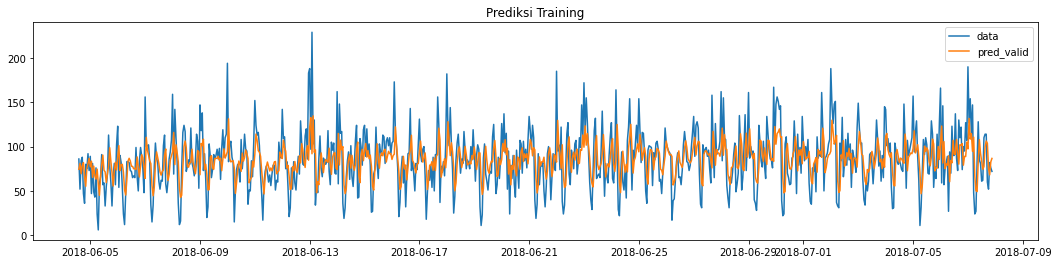

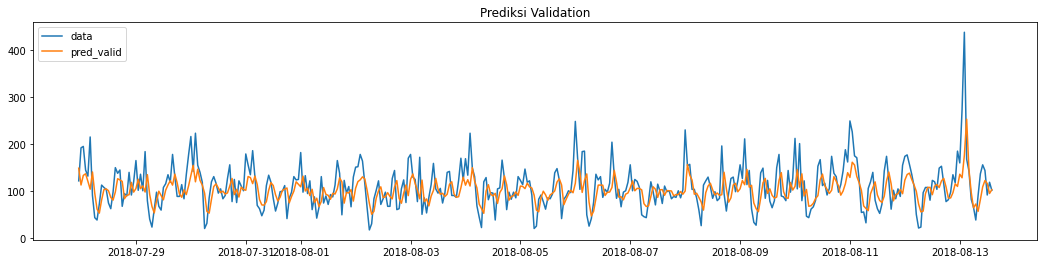

In [42]:
plt.figure(figsize=(18,4))
plt.title('Prediksi Training')
plt.plot(target_train[-800:], label='data')
plt.plot(target_train[-800:].index,lr_pred_train[-800:], label='pred_valid')
plt.legend()
plt.show()

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_valid[-400:], label='data')
plt.plot(target_valid[-400:].index,lr_pred_valid[-400:], label='pred_valid')
plt.legend()
plt.show()

Model Linear Regression memiliki nilai RMSE training sebesar 28.18 dan RMSE validation sebesar 37.99. Model ini memiliki performa yang lebih rendah dibandingkan dengen model SARIMA. Meskipun begitu model ini juga dapat memprediksi seasonality dengan baik, namun tidak sebaik model SARIMA dalam memprediksi nilai pada saat terjadi peak.

#### Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor(n_estimators=1000, max_depth = 15)
rf.fit(features_train, target_train)

In [ ]:
%%time
rf_pred_train = rf.predict(features_train)
rf_pred_valid = rf.predict(features_valid)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_train, rf_pred_train):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_valid, rf_pred_valid):.4f}')

In [ ]:
plt.figure(figsize=(18,4))
plt.title('Prediksi Training')
plt.plot(target_train[-800:], label='data')
plt.plot(target_train[-800:].index,rf_pred_train[-800:], label='pred_valid')
plt.legend()
plt.show()

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_valid[-400:], label='data')
plt.plot(target_valid[-400:].index,rf_pred_valid[-400:], label='pred_valid')
plt.legend()
plt.show()

Model dengan hyperparameter default memberikan performa yang lebih rendah dari linearregression. Selain itu terjadi overfitting pada model, yang ditandai dengan meningkatnya RMSE pada pengujian validation secara signifikan. Sekarang kita akan coba mencari hyperparameter optimal dengan menggunkan for-loops.

In [ ]:
import time
for estimator in [50,100,250,500,1000]:
    for depth in [1,2,5,8,12,16]:
        start = time.time()
        rf = RandomForestRegressor(n_estimators=estimator, max_depth = depth)
        rf.fit(features_train, target_train)
        
        rf_pred_train = rf.predict(features_train)
        rf_pred_valid = rf.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, n_est = {estimator}, md = {depth} ')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} second')
        
        train_rmse = rmse(target_train, rf_pred_train)
        valid_rmse = rmse(target_valid, rf_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()
        

Berdasarkan hasil pengujian berbagai hyperparameter di atas, dapat dilihat bahwa kenaikan n_estimator tidak berpengaruh terhadap performa model. Pada nilai max_depth yang sama misal 12, nilai RMSE validation yang diperoleh oleh n_estimator 50, 100,250, 500, dan 1000 berturut-turut adalah 39.39, 39.43, 39.37, 39.37, dan 39.24. Sedangkan hyperparameter max_depth memberikan peningkatan yang cukup signifikan. Namun pada max_depth tertentu menyebabkan model menjadi overfitting yaitu pada max_depth di atas 8, dimana selisih antara RMSE train dengan RMSE validation perbedaanya cukup besar dan kenaikan max_depth juga tidak lagi merubah nilai RMSE secara signifikan.

Selanjutnya kita akan mencoba memvariasikan min_samples_leaf dan max_depth pada n_estimator = 100.

In [ ]:
import time
for leaf in [1,5,10,20,50]:
    for depth in [2,4,8,10,12]:
        start = time.time()
        rf = RandomForestRegressor(n_estimators=100, min_samples_leaf = leaf, max_depth = depth)
        rf.fit(features_train, target_train)
        
        rf_pred_train = rf.predict(features_train)
        rf_pred_valid = rf.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, min_leaf = {leaf}, md = {depth} ')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} second')
        
        train_rmse = rmse(target_train, rf_pred_train)
        valid_rmse = rmse(target_valid, rf_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()
        

Hyperparameter min_samples_leaf tidak meningkatkan performa secara signifikan, namun overfitting pada saat max_depth > 8 tereduksi. model final yang dipakai yaitu n_estimators = 100, dan max_depth = 8 sisanya ditetapkan default.

In [ ]:
%%time
rf = RandomForestRegressor(n_estimators = 100, max_depth = 8, random_state = 123)
rf.fit(features_train, target_train)

In [ ]:
%time
rf_pred_train = rf.predict(features_train)
rf_pred_valid = rf.predict(features_valid)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_train, rf_pred_train):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_valid, rf_pred_valid):.4f}')

In [ ]:
plt.figure(figsize=(18,4))
plt.title('Prediksi Training')
plt.plot(target_train[-800:], label='data')
plt.plot(target_train[-800:].index,rf_pred_train[-800:], label='pred_valid')
plt.legend()
plt.show()

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_valid[-400:], label='data')
plt.plot(target_valid[-400:].index,rf_pred_valid[-400:], label='pred_valid')
plt.legend()
plt.show()

Meskipun telah dilakukan hyperparameter tuning, ternyata model yang didapat tetap tidak dapat mengungguli model Linear Regression.



#### Model XGBoost

Pertama kita coba terlebih dahulu model default tanpa hyperparameter tuning. Menggunakan n_estimators = 100.

In [ ]:
import xgboost as xg

In [ ]:
for depth in [1,2,5,8,12,16]:
    for lrate in [.01, .05, .1 , .2, .5]:
        start = time.time()
        xgb = xg.XGBRegressor(n_estimators = 100, max_depth = 1, learning_rate = lrate , seed = 123, random_state = 123)
        xgb.fit(features_train, target_train)
        
        xg_pred_train = xgb.predict(features_train)
        xg_pred_valid = xgb.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, learning_rate = {lrate}, md = {depth}, estimators = {100}')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} second')
        
        train_rmse = rmse(target_train, xg_pred_train)
        valid_rmse = rmse(target_valid, xg_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()
        

Berdasarkan hasil loops di atas, nilai depth tidak mempengaruh performa model sedangkan learning_rate terbaik yaitu 0.5. Selanjutnya akan dicoba trial nilai n_estimators dan learning_rate.

In [ ]:
for estimators in [100, 300, 500]:
    for lrate in [.01, .03, .2, .5]:
        start = time.time()
        xgb = xg.XGBRegressor(n_estimators = estimators, max_depth = 3, learning_rate = lrate , seed = 123, random_state = 123)
        xgb.fit(features_train, target_train)
        
        xg_pred_train = xgb.predict(features_train)
        xg_pred_valid = xgb.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, estimators = {estimators}, learning_rate = {lrate}')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} milisecond')
        
        train_rmse = rmse(target_train, xg_pred_train)
        valid_rmse = rmse(target_valid, xg_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()
        

In [ ]:
%%time
xgb = xg.XGBRegressor(n_estimators = 300, max_depth = 3, learning_rate = 0.02 , seed = 123, random_state = 123)
xgb.fit(features_train, target_train)

In [ ]:
%%time
xg_pred_train = xgb.predict(features_train)
xg_pred_valid = xgb.predict(features_valid)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_train, xg_pred_train):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_valid, xg_pred_valid):.4f}')

In [ ]:
plt.figure(figsize=(18,4))
plt.title('Prediksi Training')
plt.plot(target_train[-800:], label='data')
plt.plot(target_train[-800:].index,xg_pred_train[-800:], label='pred_valid')
plt.legend()
plt.show()

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_valid[-400:], label='data')
plt.plot(target_valid[-400:].index,xg_pred_valid[-400:], label='pred_valid')
plt.legend()
plt.show()

Model ini memberikan RMSE validation yang lebih baik dari model Random Forest Regressor namun tetap kalah oleh model SARIMA dan Linear Regression. Dapat dilihat pada grafik di atas, model ini mampu memprediksi nilai peak minimum namun kurang begitu akurat pada peak maksimum.

#### Model LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
for estimators in [50, 100, 150, 250, 500, 1000]:
        start = time.time()
        lg = lgb.LGBMRegressor(objective ='rmse', n_estimators = estimators, seed = 123)
        lg.fit(features_train, target_train)
        
        lg_pred_train = lg.predict(features_train)
        lg_pred_valid = lg.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, estimators = {estimators}')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} milisecond')
        
        train_rmse = rmse(target_train, lg_pred_train)
        valid_rmse = rmse(target_valid, lg_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()
        

RMSE paling baik terjadi pada saat n_estimators = 50, selanjutnya yaitu mencoba-coba berbagai nilai max_depth dan learning_rate.

In [ ]:
for lrate in [.01, .03, .1, .3, .5]:
    for depth in [1, 3, 5, 10, 15]:
        start = time.time()
        lg = lgb.LGBMRegressor(objective ='rmse', n_estimators = 50, learning_rate = lrate, max_depth = depth, seed = 123)
        lg.fit(features_train, target_train)
        
        lg_pred_train = lg.predict(features_train)
        lg_pred_valid = lg.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, learning_rate = {lrate}, max_depth  = {depth}')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} milisecond')
        
        train_rmse = rmse(target_train, lg_pred_train)
        valid_rmse = rmse(target_valid, lg_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()
        

Diperoleh hyperparameter terbaik yaitu pada saat learning_rate = 0.5, max_depth = 1, dan n_estimators = 50. Model ini memberikan hasil yang lebih baik dari XGboost dengan overfitting yang minimal namun tetap memiliki RMSE yang lebih besar dari SARIMA dan Linear Regression. 

In [ ]:
%%time
lg = lgb.LGBMRegressor(objective ='rmse', n_estimators = 50, learning_rate = .5, max_depth = 1, seed = 123)
lg.fit(features_train, target_train)

In [ ]:
%%time
lg_pred_train = lg.predict(features_train)
lg_pred_valid = lg.predict(features_valid)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_train, lg_pred_train):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_valid, lg_pred_valid):.4f}')

In [ ]:
plt.figure(figsize=(18,4))
plt.title('Prediksi Training')
plt.plot(target_train[-800:], label='data')
plt.plot(target_train[-800:].index,lg_pred_train[-800:], label='pred_valid')
plt.legend()
plt.show()

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_valid[-400:], label='data')
plt.plot(target_valid[-400:].index,lg_pred_valid[-400:], label='pred_valid')
plt.legend()
plt.show()

Secara grafik model ini tidak terlalu berbeda karakteristiknya dengan hasil prediksi model XGBoost yaitu baik saat memprediksi peak minimum tapi kurang bagus saat memprediksi peak maksimum.

#### Model CatBoost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
for estimators in [10, 50, 100, 250, 500, 750, 1000]:
        start = time.time()
        cb = CatBoostRegressor(n_estimators=estimators, random_state = 123, verbose=False)
        cb.fit(features_train, target_train)
        
        cb_pred_train = cb.predict(features_train)
        cb_pred_valid = cb.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, estimators = {estimators}')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} milisecond')
        
        train_rmse = rmse(target_train, cb_pred_train)
        valid_rmse = rmse(target_valid, cb_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()

Dipilih n_estimators = 750, sekarang kita akan trial learning_rate dan max_depth.

In [ ]:
for lrate in [.01, .03, .1, .3, .5]:
    for depth in [1, 3, 5, 10]:
        start = time.time()
        cb = CatBoostRegressor(n_estimators=750, max_depth = depth, learning_rate = lrate, random_state = 123, verbose=False)
        cb.fit(features_train, target_train)
        
        cb_pred_train = cb.predict(features_train)
        cb_pred_valid = cb.predict(features_valid)
        
        end = time.time()
        print(f'hyperparameter, learning_rarte = {lrate}, max_depth = {depth}')
        print('--------------------------------------------')
        print(f'time elapsed: {(end-start)*1000:.4f} milisecond')
        
        train_rmse = rmse(target_train, cb_pred_train)
        valid_rmse = rmse(target_valid, cb_pred_valid)
        
        print(f'RMSE train: {train_rmse:.4f}')
        print(f'RMSE train: {valid_rmse:.4f}')
        print('--------------------------------------------')
        print()

dipilih hyperparameter yang memiliki RMSE validation rendah namun tidak terpaut jauh dengan nilai RMSE trainingnya. Yaitu pada saat learning_rate = 0.03 dan max_depth = 3.

In [ ]:
%%time
cb = CatBoostRegressor(n_estimators=750, max_depth = 3, learning_rate = 0.03 , random_state = 123, verbose=False)
cb.fit(features_train, target_train)

In [ ]:
%%time
cb_pred_train = cb.predict(features_train)
cb_pred_valid = cb.predict(features_valid)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_train, cb_pred_train):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_valid, cb_pred_valid):.4f}')

In [ ]:
plt.figure(figsize=(18,4))
plt.title('Prediksi Training')
plt.plot(target_train[-800:], label='data')
plt.plot(target_train[-800:].index,cb_pred_train[-800:], label='pred_valid')
plt.legend()
plt.show()

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_valid[-400:], label='data')
plt.plot(target_valid[-400:].index,cb_pred_valid[-400:], label='pred_valid')
plt.legend()
plt.show()

Lagi-lagi hasilnya kurang lebih tidak berbeda jauh dengan model Random Forest. Selanjutnya kita akan melakukan pengujian terhadap test dataset terhadap model-model yang telah dibuat sebelumnya. Selain RMSE kita juga akan mempertimbangkan waktu eksekusi model.

## Pengujian

Pertama kita siapkan terlebih dahulu training testnya yaitu merupakan dataset training dan validation yang digabungkan yaitu tersimpan pada variable yang bernama sisa.

In [ ]:
#Feature
features_sisa= sisa.drop(['num_orders'], axis = 1)
features_test = test.drop(['num_orders'], axis = 1)

#Target
target_sisa= sisa['num_orders']
target_test = test['num_orders']

### SARIMA

In [ ]:
%%time
sarima = ARIMA(sisa_mt, order=(2,0,4), seasonal_order =(1,0,2,24))
model_sarima = sarima.fit()

In [ ]:
%%time
pred_sisa = model_sarima.predict(
    start=0, 
    end=sisa_mt.shape[0]-1, 
    dynamic=False)
pred_test = model_sarima.predict(
    start=sisa_mt.shape[0], 
    end=sisa_mt.shape[0]+test_mt.shape[0]-1, 
    dynamic=False)

In [ ]:
print(f'Nilai RMSE Training: {rmse(sisa_mt[3:], pred_sisa[3:]):.4f}')
print(f'Nilai RMSE Validation: {rmse(test_mt, pred_test):.4f}')

### Linear Regression

In [ ]:
%%time
lr = LinearRegression()
lr.fit(features_sisa, target_sisa)

In [ ]:
%time
lr_pred_sisa = lr.predict(features_sisa)
lr_pred_test = lr.predict(features_test)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_sisa, lr_pred_sisa):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_test, lr_pred_test):.4f}')

### Random Forest Regressor

In [ ]:
%%time
rf = RandomForestRegressor(n_estimators = 100, max_depth = 8, random_state = 123)
rf.fit(features_sisa, target_sisa)

In [ ]:
%time
rf_pred_sisa = rf.predict(features_sisa)
rf_pred_test = rf.predict(features_test)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_sisa, rf_pred_sisa):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_test, rf_pred_test):.4f}')

### XGBoost

In [ ]:
%%time
xgb = xg.XGBRegressor(n_estimators = 300, max_depth = 3, learning_rate = 0.03 , seed = 123, random_state = 123)
xgb.fit(features_sisa, target_sisa)

In [ ]:
%%time
xg_pred_sisa = xgb.predict(features_sisa)
xg_pred_test = xgb.predict(features_test)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_sisa, xg_pred_sisa):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_test, xg_pred_test):.4f}')

### LightGBM

In [ ]:
%%time
lg = lgb.LGBMRegressor(objective ='rmse', n_estimators = 100, learning_rate = .1, max_depth = 15, seed = 123)
lg.fit(features_sisa, target_sisa)

In [ ]:
%%time
lg_pred_sisa = lg.predict(features_sisa)
lg_pred_test = lg.predict(features_test)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_sisa, lg_pred_sisa):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_test, lg_pred_test):.4f}')

### CatBoost

In [ ]:
%%time
cb = CatBoostRegressor(n_estimators=250, max_depth = 3, learning_rate = 0.1 , random_state = 123, verbose=False)
cb.fit(features_sisa, target_sisa)

In [ ]:
%%time
cb_pred_sisa = cb.predict(features_sisa)
cb_pred_test = cb.predict(features_test)

In [ ]:
print(f'Nilai RMSE Training: {rmse(target_sisa, cb_pred_sisa):.4f}')
print(f'Nilai RMSE Validation: {rmse(target_test, cb_pred_test):.4f}')

### Perbandingan Model

Model dibandingkan berdasarkan metrik waktu eksekusi dan nilai RMSE dengan hasil sebagai berikut.

|Model|Training Time| Prediction Time|Test RMSE|
|----|------|--------|------|
|SARIMA|6 min 7 s | <1ms| 50.4|
|Linear Regression|6.17 ms|<1ms| 53.37|
|Random Forest|1.34 s|<1ms|57.47|
|XGBoost|28.9 s| 16.4 ms| 59.02|
|LightGBM|2.13 s| 87.7 ms| 54.52|
|CatBoost|374 ms|4.5 ms| 54.24|

In [ ]:
n_data = 20

plt.figure(figsize=(18,4))
plt.title('Prediksi Validation')
plt.plot(target_test[-n_data:],'-o', label='data')
plt.plot(target_test[-n_data:].index,pred_test[-n_data:],'--r', label='SARIMA', linewidth=.8)
plt.plot(target_test[-n_data:].index,lr_pred_test[-n_data:],'--y', label='Linear Regression', linewidth=.8)
plt.plot(target_test[-n_data:].index,rf_pred_test[-n_data:],'--c', label='Random Forest', linewidth=.8)
plt.plot(target_test[-n_data:].index,xg_pred_test[-n_data:],'--k', label='XGB', linewidth=.8)
plt.plot(target_test[-n_data:].index,lg_pred_test[-n_data:],'--m', label='LightGBM', linewidth=.8)
plt.plot(target_test[-n_data:].index,cb_pred_test[-n_data:],'--g', label='CatBoost', linewidth=.8)
plt.grid()
plt.legend()
plt.show()

Dari analisa yang telah dilakukan diperoleh hasil sebagai berikut:
1. Model dengan nilai RMSE test terbaik yaitu SARIMA dengan training time yang paling lama yaitu 6 min 7 s. Meskipun begitu, RMSE yang dihasilkan melebihi target RMSE yaitu 48.
2. Model paling optimal yaitu Linear Regression dengan RMSE yang tidak terlampau jauh dibandingkan SARIMA akan tetapi memiliki training dan prediction time yang cepat yaitu sekitar 6.17 detik.
3. Model palong tidak optimal yaitu XGBoost dengan training time yang cukup lama yaitu 28.9s namun RMSE yang diperoleh paling rendah dibandingkan yang lain yaitu 59.02.
4. Secara overall model yang dipilih yaitu Linear Regression, meskipun RMSE nya lebih besar sedikit dibandingkan SARIMA namun dapat menghemat memori komputasi secara signifikan serta memiliki RMSE training yang tidak terlampau jauh dibandingkan test RMSE.
5. Apabila kita melihat grafik, dapat dilihat bahwa sebenarnya selain SARIMA seharusnya memiliki nilai prediksi yang jauh lebih bagus. Lihat pada data pertama dan data kedua. Data kedua pada prediksi model-model tersebut hampir mendekati hasil dari data pertama dari target. Begitu pula dengan data selanjutnya. Saya akan coba hitung dengan melakukan shifting pada data target apakah RMSEnya lebih bagus atau tidak. Mungkin bisa dijelaskan? apakah memang seharusnya hasil prediksi dari model selain SARIMA memang perlu dilakukan shifting. dimana model tersebut memprediksi feature pada data t, yang sebenarnya dia memprediksi target dari t-1?.

In [ ]:
shift = target_test.shift(1)
shift = shift.dropna()

print('Linear Regression:')
print(f'Nilai RMSE Validation: {rmse(target_test2, lr_pred_test[1:]):.4f}')

print('Random Forest:')
print(f'Nilai RMSE Validation: {rmse(target_test2, rf_pred_test[1:]):.4f}')

print('XGB:')
print(f'Nilai RMSE Validation: {rmse(target_test2, xg_pred_test[1:]):.4f}')

print('LightGBM:')
print(f'Nilai RMSE Validation: {rmse(target_test2, lg_pred_test[1:]):.4f}')

print('CatBoost:')
print(f'Nilai RMSE Validation: {rmse(target_test2, cb_pred_test[1:]):.4f}')

Benar saja, setelah dilakukan shifting nilai RMSE nya meningkat drastis. Jika benar hasil prediksi model harus dishifting terlebih dahulu untuk mendapatkan hasil prediksi sebenarnya. Maka selain model SARIMA telah berhasil melampaui target RMSE lebih kecil dari 48.

Namun yang menjadi pertanyaan saya yaitu, meskipun SARIMA akhirnya terkesan kalah dari model lainnya. Tapi terdapat perbedaan feature yang digunakan. Kita tahu bahwa model SARIMA mengolah featurenya sendiri dengan perhitungan bawaan fungsi ARIMA. Dimana pada saat prediksi kita **tidak memasukan sama sekali** feature prediksi, yang artinya feature yang kita provide yaitu hanya index tanggal saja. Kemudian untuk mendapatkan feature selanjutnya ia harus prediksi satu persatu. Misal, untuk memprediksi data ke t+1 ia menggunakan feature dari hasil prediksi saat data ke t. Dimana hasil prediksi data ke t itu sendiri pasti memiliki eror. Jadi ia menggunakan data feature yang memiliki error memprediksi data selanjutnya. Berbeda dengan selain model SARIMA, feature setiap data sudah tersedia dari dataset awal dimana feature tersebut dihasilkan dari data sebenarnya sehingga tidak ada error. Maka wajar saja jika selain model SARIMA akan memiliki nilai RMSE yang bagus.

Seharusnya agar fair, SARIMA harus memprediksi data ke t saat data-data aktual sebelumnya, yang selanjutnya akan dijadikan feature, telah diketahui.

Model final:

Linear Regression.

RMSE: 37.09.

Training time: 6.17 ms.

Prediction time: <1ms.

# Daftar Periksa Penilaian

- [x]  Jupyter Notebook bisa dibuka.
- [x]  Tidak ada kesalahan dalam kode
- [x]  Sel-sel dengan kode telah disusun berdasarkan urutan eksekusi.
- [x]  Data telah diunduh dan disiapkan
- [x]  Data telah dianalisis
- [x]  Model sudah dilatih dan hiperparameter sudah dipilih
- [x]  Model sudah dievaluasi. Kesimpulan sudah ada.
- [x] *RMSE* untuk *test set* tidak lebih dari 48